## AAC vs RS

In [13]:
import pandas as pd
df = pd.read_csv("sorghum/starch.csv")
df

,A1,A2,A3,A4,A5,A6,RS1,RS2,RS3,RS4,RS5,RS6
0,34.161752,24.651251,26.978996,32.432570,28.708178,35.491892,2.402464,5.236140,4.373717,4.681725,3.942505,4.589322
1,28.575164,24.717758,39.016763,37.354088,28.575164,31.035923,4.065708,5.328542,2.895277,6.283368,4.866530,2.926078
2,22.855562,26.513447,24.651251,39.083270,18.931649,39.814847,2.864476,3.726899,5.543147,4.538071,4.050761,6.670051
3,NaN,23.653646,NaN,NaN,NaN,35.558399,3.480493,3.480493,4.598985,7.248731,6.944162,6.182741
4,NaN,29.772290,NaN,NaN,NaN,36.090455,NaN,NaN,4.416244,NaN,3.959391,6.395939


In [15]:
df.loc[0,'A1'] = None
df.loc[0,'RS1'] = None
df.loc[3,'RS5']= None
df

,A1,A2,A3,A4,A5,A6,RS1,RS2,RS3,RS4,RS5,RS6
0,NaN,24.651251,26.978996,32.432570,28.708178,35.491892,NaN,5.236140,4.373717,4.681725,3.942505,4.589322
1,28.575164,24.717758,39.016763,37.354088,28.575164,31.035923,4.065708,5.328542,2.895277,6.283368,4.866530,2.926078
2,22.855562,26.513447,24.651251,39.083270,18.931649,39.814847,2.864476,3.726899,5.543147,4.538071,4.050761,6.670051
3,NaN,23.653646,NaN,NaN,NaN,35.558399,3.480493,3.480493,4.598985,7.248731,NaN,6.182741
4,NaN,29.772290,NaN,NaN,NaN,36.090455,NaN,NaN,4.416244,NaN,3.959391,6.395939


In [16]:
avg = df.mean(axis=0)
std = df.std(axis=0)
avg_std = pd.DataFrame({'avg': avg.values, 'std': std.values})
display(avg_std)
ar = pd.DataFrame({'AAC': avg.loc['A1':'A6'].values, 'RS': avg.loc['RS1':'RS6'].values})
display(ar)

,avg,std
0,25.715363,4.044369
1,25.861678,2.416960
2,30.215670,7.710320
3,36.289976,3.450682
4,25.404997,5.606478
5,35.598303,3.116476
6,3.470226,0.600682
7,4.443018,0.975103
8,4.365474,0.949416
9,5.687974,1.307067


,AAC,RS
0,25.715363,3.470226
1,25.861678,4.443018
2,30.215670,4.365474
3,36.289976,5.687974
4,25.404997,4.204797
5,35.598303,5.352826


In [17]:
import seaborn as sns
sns.regplot(x='AAC', y='RS', data=ar)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [18]:
from scipy import stats
# 相关系数，显著性区别
stats.pearsonr(ar['AAC'], ar['RS'])

(0.8977921735443055, 0.015135805730689412)

In [19]:
stats.spearmanr(ar['AAC'], ar['RS'])

SpearmanrResult(correlation=0.8857142857142858, pvalue=0.01884548104956266)

In [20]:
stats.kendalltau(ar['AAC'], ar['RS'])

KendalltauResult(correlation=0.7333333333333333, pvalue=0.03877750439230665)

## Protein vs RS

In [22]:
import pandas as pd
df = pd.read_csv("sorghum/protein.csv")
df

,1,2,3,4,5,6
0,10.3530,16.7195,10.8885,11.7810,12.6140,14.4585
1,11.1860,16.1840,11.6025,12.3165,12.4950,15.5295
2,10.8290,17.3145,10.9480,11.9000,12.8520,14.8155
3,10.1745,17.1360,10.9480,11.4835,12.7925,15.8270


In [23]:
avg_protein = df.mean(axis=0)
protein_rs = pd.DataFrame({'protein': avg_protein.values, 'RS': ar['RS'].values})
protein_rs

,protein,RS
0,10.635625,3.470226
1,16.838500,4.443018
2,11.096750,4.365474
3,11.870250,5.687974
4,12.688375,4.204797
5,15.157625,5.352826


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


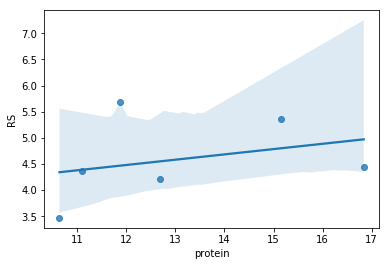

In [24]:
sns.regplot(x='protein', y='RS', data=protein_rs)

In [25]:
stats.pearsonr(protein_rs['protein'], protein_rs['RS'])

(0.30720795891625663, 0.5536847029251615)